#CIFAR10 Classification using Convolutional Neural Network
##Name- Swastik Mahapatra       Email:-swastik.mhptr@gmail.com

The Model here is made from scratch Python , with only numpy used for vectorization and broadcasting.
The Convolutional Neural Network has 2 Convolutional Layers which are RELU activated and then are followed by Max-Pooling

##  Packages Used

- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- np.random.seed(1) is used to keep all the random function calls consistent.

In [63]:
import numpy as np
import math

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Extracting Data from CIFAR10 Batch1 which is in .pkl format

In [0]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [7]:
file="CIFAR10_data/data_batch_1"
batch1=unpickle(file)
print(batch1)

{b'batch_label': b'training batch 1 of 5', b'labels': [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 

In [0]:
batch1d=np.zeros((10000,3072))
batch1l=np.zeros((1,10000))
batch1d[:]=batch1[b'data']
batch1l[:]=batch1[b'labels']

In [9]:
print(batch1d)
print(batch1l)

[[ 59.  43.  50. ... 140.  84.  72.]
 [154. 126. 105. ... 139. 142. 144.]
 [255. 253. 253. ...  83.  83.  84.]
 ...
 [ 71.  60.  74. ...  68.  69.  68.]
 [250. 254. 211. ... 215. 255. 254.]
 [ 62.  61.  60. ... 130. 130. 131.]]
[[6. 9. 9. ... 1. 1. 5.]]


#Activation Functions

In [0]:
def relu(z):
    
    s = np.maximum(0,z)
    
    return s

In [0]:
def reluderivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

In [0]:
def softmax(x):
    e_x = np.exp(x)
    return np.exp(x) / np.sum(e_x,axis=0)

In [0]:
def relu_forward(X):
    out = np.maximum(X, 0)
    return out

In [0]:
def relu_backward(dout, cache):
    dX = dout.copy()
    dX[cache <= 0] = 0
    return dX

Functions to convert numpy arrays from matrix to image form and from image to matrix form, for convolutional layer calculations

In [0]:

def get_im2col_indices(x_shape, field_height, field_width, padding=1, stride=1):
    N, C, H, W = x_shape
    assert (H + 2 * padding - field_height) % stride == 0
    assert (W + 2 * padding - field_height) % stride == 0
    out_height = int((H + 2 * padding - field_height) / stride + 1)
    out_width = int((W + 2 * padding - field_width) / stride + 1)

    i0 = np.repeat(np.arange(field_height), field_width)
    i0 = np.tile(i0, C)
    i1 = stride * np.repeat(np.arange(out_height), out_width)
    j0 = np.tile(np.arange(field_width), field_height * C)
    j1 = stride * np.tile(np.arange(out_width), out_height)
    i = i0.reshape(-1, 1) + i1.reshape(1, -1)
    j = j0.reshape(-1, 1) + j1.reshape(1, -1)

    k = np.repeat(np.arange(C), field_height * field_width).reshape(-1, 1)

    return (k.astype(int), i.astype(int), j.astype(int))


def im2col_indices(x, field_height, field_width, padding=1, stride=1):    
    p = padding
    x_padded = np.pad(x, ((0, 0), (0, 0), (p, p), (p, p)), mode='constant')

    k, i, j = get_im2col_indices(x.shape, field_height, field_width, padding, stride)

    cols = x_padded[:, k, i, j]
    C = x.shape[1]
    cols = cols.transpose(1, 2, 0).reshape(field_height * field_width * C, -1)
    return cols


def col2im_indices(cols, x_shape, field_height=3, field_width=3, padding=1,
                   stride=1):
    N, C, H, W = x_shape
    H_padded, W_padded = H + 2 * padding, W + 2 * padding
    x_padded = np.zeros((N, C, H_padded, W_padded), dtype=cols.dtype)
    k, i, j = get_im2col_indices(x_shape, field_height, field_width, padding, stride)
    cols_reshaped = cols.reshape(C * field_height * field_width, -1, N)
    cols_reshaped = cols_reshaped.transpose(2, 0, 1)
    np.add.at(x_padded, (slice(None), k, i, j), cols_reshaped)
    if padding == 0:
        return x_padded
    return x_padded[:, :, padding:-padding, padding:-padding]

Initialising Weights and Bias

In [0]:
def initialize(layer):
    
    l = len(layer)
    parameters = {}
    np.random.seed(0)
    D1=8
    D2=16
    parameters["Wc"+str(1)]=np.random.randn(D1, 3, 3, 3) / np.sqrt(D1 / 2.)
    parameters["bc"+str(1)]=np.zeros((D1, 1))
    parameters["Wc"+str(2)]=np.random.randn(D2, 8, 3, 3) / np.sqrt(D2 / 2.)
    parameters["bc"+str(2)]=np.zeros((D2, 1))
    for i in range(1,l-1):
      parameters["W"+str(i)]=np.random.randn(layer[i],layer[i-1]) * np.sqrt(2/layer[i-1]) 
      parameters["b"+str(i)]=np.zeros((layer[i],1))
    
    parameters["W"+str(l-1)]=np.random.randn(layer[l-1],layer[l-2]) * 0.001
    parameters["b"+str(l-1)]=np.zeros((layer[l-1],1)) 
   
    
    return parameters

Initialising parameters for ADAM optimisation

In [0]:
def initialize_adam(parameters,layer) :
    
    L = (len(parameters)-4) // 2
    v = {}
    s = {}
    
   #for 1st convolutional layer
    v["dwc" + str(1)] = np.zeros(parameters['Wc' + str(1)].shape)
    v["dbc" + str(1)] = np.zeros(parameters['bc' + str(1)].shape)
    s["dwc" + str(1)] = np.zeros(parameters['Wc' + str(1)].shape)
    s["dbc" + str(1)] = np.zeros(parameters['bc' + str(1)].shape)
  #for 2nd convolutional layer
    v["dwc" + str(2)] = np.zeros(parameters['Wc' + str(2)].shape)
    v["dbc" + str(2)] = np.zeros(parameters['bc' + str(2)].shape)
    s["dwc" + str(2)] = np.zeros(parameters['Wc' + str(2)].shape)
    s["dbc" + str(2)] = np.zeros(parameters['bc' + str(2)].shape)
  
    for l in range(L-1):
      v["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
      v["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
      s["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
      s["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
    
    
    return v, s

Function to create Random mini Batches

In [0]:
def random_mini_batches(X, Y, mini_batch_size = 512):
    
               
    m = X.shape[0]                  
    mini_batches = []
        
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:]
    shuffled_Y = Y[:,permutation].reshape((10,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k*mini_batch_size : (k+1)*mini_batch_size,:]
        mini_batch_Y = shuffled_Y[:,k*mini_batch_size : (k+1)*mini_batch_size]
      
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        
        mini_batch_X = shuffled_X[num_complete_minibatches*mini_batch_size:,:]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches*mini_batch_size:]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

Forward Propagation through Convolutional Layers

In [0]:
def conv_forward(X, W, b, stride=1, padding=1):
    cache = W, b, stride, padding
    n_filters, d_filter, h_filter, w_filter = W.shape
    n_x, d_x, h_x, w_x = X.shape
    h_out = (h_x - h_filter + 2 * padding) / stride + 1
    w_out = (w_x - w_filter + 2 * padding) / stride + 1

    h_out, w_out = int(h_out), int(w_out)

    X_col = im2col_indices(X, h_filter, w_filter, padding=padding, stride=stride)
    W_col = W.reshape(n_filters, -1)

    out = W_col @ X_col + b
    out = out.reshape(n_filters, h_out, w_out, n_x)
    out = out.transpose(3, 0, 1, 2)

    cache = (X, W, b, stride, padding, X_col)

    return out, cache

BackPropagation through convolutional Layers

In [0]:
def conv_backward(dout, cache):
    X, W, b, stride, padding, X_col = cache
    n_filter, d_filter, h_filter, w_filter = W.shape

    db = np.sum(dout, axis=(0, 2, 3))
    db = db.reshape(n_filter, -1)

    dout_reshaped = dout.transpose(1, 2, 3, 0).reshape(n_filter, -1)
    dW = dout_reshaped @ X_col.T
    dW = dW.reshape(W.shape)

    W_reshape = W.reshape(n_filter, -1)
    dX_col = W_reshape.T @ dout_reshaped
    dX = col2im_indices(dX_col, X.shape, h_filter, w_filter, padding=padding, stride=stride)

    return dX, dW, db


Function to forward propagate through Pool Layer

In [0]:
def _pool_forward(X, pool_fun, size=2, stride=2):
    n, d, h, w = X.shape
    h_out = (h - size) / stride + 1
    w_out = (w - size) / stride + 1

    if not w_out.is_integer() or not h_out.is_integer():
        raise Exception('Invalid output dimension!')

    h_out, w_out = int(h_out), int(w_out)

    X_reshaped = X.reshape(n * d, 1, h, w)
    X_col = im2col_indices(X_reshaped, size, size, padding=0, stride=stride)

    out, pool_cache = pool_fun(X_col)

    out = out.reshape(h_out, w_out, n, d)
    out = out.transpose(2, 3, 0, 1)

    cache = (X, size, stride, X_col, pool_cache)

    return out, cache

Function to back propagate through Pool Layer

In [0]:
def _pool_backward(dout, dpool_fun, cache):
    X, size, stride, X_col, pool_cache = cache
    n, d, w, h = X.shape

    dX_col = np.zeros_like(X_col)
    dout_col = dout.transpose(2, 3, 0, 1).ravel()

    dX = dpool_fun(dX_col, dout_col, pool_cache)

    dX = col2im_indices(dX_col, (n * d, 1, h, w), size, size, padding=0, stride=stride)
    dX = dX.reshape(X.shape)

    return dX

Function for one max pooling layer

In [0]:
def maxpool_forward(X, size=2, stride=2):
    def maxpool(X_col):
        max_idx = np.argmax(X_col, axis=0)
        out = X_col[max_idx, range(max_idx.size)]
        return out, max_idx

    return _pool_forward(X, maxpool, size, stride)

Functuon for back propagation on max pooling 

In [0]:

def maxpool_backward(dout, cache):
    def dmaxpool(dX_col, dout_col, pool_cache):
        dX_col[pool_cache, range(dout_col.size)] = dout_col
        return dX_col

    return _pool_backward(dout, dmaxpool, cache)

Forward Propagation without Dropouts, used for testing

In [0]:
def fwd_propagation(X,parameters,layer):
  
  l = len(layer)
  forward = {}
  cache={}
  #for convolutional part
  forward["Zc"+str(1)], cache["Zc"+str(1)] = conv_forward(X, parameters['Wc'+str(1)], parameters['bc'+str(1)])
  forward["Ac"+str(1)]= relu_forward(forward["Zc"+str(1)])
  forward["Pc"+str(1)], cache["Pc"+str(1)] = maxpool_forward(forward["Ac"+str(1)])
      
  forward["Zc"+str(2)], cache["Zc"+str(2)] = conv_forward(forward["Pc"+str(1)], parameters['Wc'+str(2)], parameters['bc'+str(2)])
  forward["Ac"+str(2)]= relu_forward(forward["Zc"+str(2)])
  forward["Pc"+str(2)], cache["Pc"+str(2)] = maxpool_forward(forward["Ac"+str(2)])
  
  #to flatten for fully connected layers
  h2 = forward["Pc"+str(2)].ravel().reshape(X.shape[0],-1)
  h2=np.transpose(h2)
  #for fully connected part
  forward["Z"+str(1)]=np.dot(parameters["W"+str(1)],h2)+parameters["b"+str(1)]
  forward["A"+str(1)]=relu(forward["Z"+str(1)])
  
  for i in range(2,l-1):
    forward["Z"+str(i)]=np.dot(parameters["W"+str(i)],forward["A"+str(i-1)])+parameters["b"+str(i)]
    forward["A"+str(i)]=relu(forward["Z"+str(i)])
   
  forward["Z"+str(l-1)]=np.dot(parameters["W"+str(l-1)],forward["A"+str(l-2)])+parameters["b"+str(l-1)]
  forward["A"+str(l-1)]=softmax(forward["Z"+str(l-1)])
  
  return forward,cache

Forward Propagation with dropouts for fully connected layers

In [0]:
def fwd_propagation_drop(X,parameters,layer,keep_prob):
  drop = {}
  l = len(layer)
  forward = {}
  cache={}
  
  #for convolutional part
  forward["Zc"+str(1)], cache["Zc"+str(1)] = conv_forward(X, parameters['Wc'+str(1)], parameters['bc'+str(1)],stride=1,padding=1)
  forward["Ac"+str(1)]= relu_forward(forward["Zc"+str(1)])
  forward["Pc"+str(1)], cache["Pc"+str(1)] = maxpool_forward(forward["Ac"+str(1)])
      
  forward["Zc"+str(2)], cache["Zc"+str(2)] = conv_forward(forward["Pc"+str(1)], parameters['Wc'+str(2)], parameters['bc'+str(2)],stride=1,padding=1)
  forward["Ac"+str(2)]= relu_forward(forward["Zc"+str(2)])
  forward["Pc"+str(2)], cache["Pc"+str(2)] = maxpool_forward(forward["Ac"+str(2)])
  
  #to flatten for fully connected layers
  h2 = forward["Pc"+str(2)].ravel().reshape(X.shape[0], -1)
  h2=np.transpose(h2)
  #for fully connected part
  forward["Z"+str(1)]=np.dot(parameters["W"+str(1)],h2)+parameters["b"+str(1)]
    
  forward["A"+str(1)]=relu(forward["Z"+str(1)])
  drop["d"+str(1)]=(np.random.rand(forward["A"+str(1)].shape[0],forward["A"+str(1)].shape[1])) < keep_prob[1]
    
  forward["A"+str(1)] = np.multiply(forward["A"+str(1)],drop["d"+str(1)])
  forward["A"+str(1)] = forward["A"+str(1)] / keep_prob[1]
  
  for i in range(2,l-1):
    forward["Z"+str(i)]=np.dot(parameters["W"+str(i)],forward["A"+str(i-1)])+parameters["b"+str(i)]
    
    forward["A"+str(i)]=relu(forward["Z"+str(i)])
    drop["d"+str(i)]=(np.random.rand(forward["A"+str(i)].shape[0],forward["A"+str(i)].shape[1])) < keep_prob[i]
    
    forward["A"+str(i)] = np.multiply(forward["A"+str(i)],drop["d"+str(i)])
    forward["A"+str(i)] = forward["A"+str(i)] / keep_prob[i]
    
  forward["Z"+str(l-1)]=np.dot(parameters["W"+str(l-1)],forward["A"+str(l-2)])+parameters["b"+str(l-1)]
  forward["A"+str(l-1)]=softmax(forward["Z"+str(l-1)])
  
  return forward,cache

Back Propagation through the network while using L2 regularization for fully connected layers

In [0]:
def back_prop(X,Y,forward,cache,layer,parameters,lambd=0.6):
  m = X.shape[1]
  l = len(layer)
  grads = {}
  
  grads["dz"+str(l-1)]= forward["A"+str(l-1)] - Y
  grads["dw"+str(l-1)]=(np.dot(grads["dz"+str(l-1)],forward["A"+str(l-2)].T) / m) + ((lambd/m)*parameters["W"+str(l-1)])
  grads["db"+str(l-1)]=np.sum(grads["dz"+str(l-1)],axis=1,keepdims=True) / m 
  grads["da"+str(l-2)]=np.dot(parameters["W"+str(l-1)].T,grads["dz"+str(l-1)])
  
  for i in range(l-2,1,-1):
    grads["dz"+str(i)]=grads["da"+str(i)]*reluderivative(forward["A"+str(i)])
    grads["dw"+str(i)]=(np.dot(grads["dz"+str(i)],forward["A"+str(i-1)].T) / m) + ((lambd/m)*parameters["W"+str(i)])
    grads["db"+str(i)]=np.sum(grads["dz"+str(i)],axis=1,keepdims=True)/m
    grads["da"+str(i-1)]=np.dot(parameters["W"+str(i)].T,grads["dz"+str(i)])
  
  grads["dz"+str(1)]=grads["da"+str(1)]*reluderivative(forward["A"+str(1)])
  h8 = forward["Pc"+str(2)].ravel().reshape(X.shape[0], -1)
  h8=np.transpose(h8)
  grads["dw"+str(1)]=np.dot(grads["dz"+str(1)],h8.T)/m + ((lambd/m)*parameters["W"+str(1)])

  grads["db"+str(1)]=np.sum(grads["dz"+str(1)],axis=1,keepdims=True)/m
  grads["da"+str(0)]=np.dot(parameters["W"+str(1)].T,grads["dz"+str(1)])
  
  #conversion to enter convolutional layers
  cnv = grads["da"+str(0)].ravel().reshape(forward["Pc"+str(2)].shape)
  # Pool-1
  grads["dp"+str(2)] = maxpool_backward(cnv, cache["Pc"+str(2)])

  grads["dzc"+str(2)] = relu_backward(grads["dp"+str(2)], forward["Zc"+str(2)])
  grads["dac"+str(1)], grads["dwc"+str(2)], grads["dbc"+str(2)] = conv_backward(grads["dzc"+str(2)], cache["Zc"+str(2)])
  
  grads["dp"+str(1)] = maxpool_backward(grads["dac"+str(1)], cache["Pc"+str(1)])
  grads["dzc"+str(1)] = relu_backward(grads["dp"+str(1)], forward["Zc"+str(1)])
  grads["dac"+str(0)], grads["dwc"+str(1)], grads["dbc"+str(1)] = conv_backward(grads["dzc"+str(1)], cache["Zc"+str(1)])

    
  return grads

Updation of parameters using ADAM's Optimization

In [0]:
def update_parameters_with_adam(parameters, grads, layer, v, s, t, learning_rate = 0.01, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    
    
    L = (len(parameters)-4) //2                           # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    #For 2nd convolutional layer
    v["dwc" + str(2)] = beta1 * v['dwc' + str(2)] + (1-beta1) * grads['dwc' + str(2)]
    v["dbc" + str(2)] = beta1 * v['dbc' + str(2)] + (1-beta1) * grads['dbc' + str(2)]
       
    v_corrected["dwc" + str(2)] = v['dwc' + str(2)] / (1 - np.power(beta1, t))
    v_corrected["dbc" + str(2)] = v['dbc' + str(2)] / (1 - np.power(beta1, t))
       

    s["dwc" + str(2)] = beta2 * s['dwc' + str(2)] + (1-beta2) * np.power(grads['dwc' + str(2)], 2)
    s["dbc" + str(2)] = beta2 * s['dbc' + str(2)] + (1-beta2) * np.power(grads['dbc' + str(2)], 2)
        
    s_corrected["dwc" + str(2)] = s['dwc' + str(2)] / (1 - np.power(beta2, t))
    s_corrected["dbc" + str(2)] = s['dbc' + str(2)] / (1 - np.power(beta2, t))
       
    parameters["Wc" + str(2)] = parameters['Wc' + str(2)] - learning_rate * v_corrected['dwc' + str(2)] / np.sqrt(s_corrected['dwc' + str(2)] + epsilon)
    parameters["bc" + str(2)] = parameters['bc' + str(2)] - learning_rate * v_corrected['dbc' + str(2)] / np.sqrt(s_corrected['dbc' + str(2)] + epsilon)
    
    #for 1st convolutional layer
    v["dwc" + str(1)] = beta1 * v['dwc' + str(1)] + (1-beta1) * grads['dwc' + str(1)]
    v["dbc" + str(1)] = beta1 * v['dbc' + str(1)] + (1-beta1) * grads['dbc' + str(1)]
       
    v_corrected["dwc" + str(1)] = v['dwc' + str(1)] / (1 - np.power(beta1, t))
    v_corrected["dbc" + str(1)] = v['dbc' + str(1)] / (1 - np.power(beta1, t))
       

    s["dwc" + str(1)] = beta2 * s['dwc' + str(1)] + (1-beta2) * np.power(grads['dwc' + str(1)], 2)
    s["dbc" + str(1)] = beta2 * s['dbc' + str(1)] + (1-beta2) * np.power(grads['dbc' + str(1)], 2)
        
    s_corrected["dwc" + str(1)] = s['dwc' + str(1)] / (1 - np.power(beta2, t))
    s_corrected["dbc" + str(1)] = s['dbc' + str(1)] / (1 - np.power(beta2, t))
       
    parameters["Wc" + str(1)] = parameters['Wc' + str(1)] - learning_rate * v_corrected['dwc' + str(1)] / np.sqrt(s_corrected['dwc' + str(1)] + epsilon)
    parameters["bc" + str(1)] = parameters['bc' + str(1)] - learning_rate * v_corrected['dbc' + str(1)] / np.sqrt(s_corrected['dbc' + str(1)] + epsilon)
    
    for l in range(L-1):
       
        v["dW" + str(l+1)] = beta1 * v['dW' + str(l+1)] + (1-beta1) * grads['dw' + str(l+1)]
        v["db" + str(l+1)] = beta1 * v['db' + str(l+1)] + (1-beta1) * grads['db' + str(l+1)]
       
        v_corrected["dw" + str(l+1)] = v['dW' + str(l+1)] / (1 - np.power(beta1, t))
        v_corrected["db" + str(l+1)] = v['db' + str(l+1)] / (1 - np.power(beta1, t))
       

        s["dW" + str(l+1)] = beta2 * s['dW' + str(l+1)] + (1-beta2) * np.power(grads['dw' + str(l+1)], 2)
        s["db" + str(l+1)] = beta2 * s['db' + str(l+1)] + (1-beta2) * np.power(grads['db' + str(l+1)], 2)
        
        s_corrected["dw" + str(l+1)] = s['dW' + str(l+1)] / (1 - np.power(beta2, t))
        s_corrected["db" + str(l+1)] = s['db' + str(l+1)] / (1 - np.power(beta2, t))
       
        parameters["W" + str(l+1)] = parameters['W' + str(l+1)] - learning_rate * v_corrected['dw' + str(l+1)] / np.sqrt(s_corrected['dw' + str(l+1)] + epsilon)
        parameters["b" + str(l+1)] = parameters['b' + str(l+1)] - learning_rate * v_corrected['db' + str(l+1)] / np.sqrt(s_corrected['db' + str(l+1)] + epsilon)
       
    return parameters, v, s

Prediction function used to predict for validation and test set

In [0]:
def predict(X,parameters,layers):
  l= len(layer)
  fwd,cache = fwd_propagation(X,parameters,layers)
  
  Y1 = fwd["A"+str(l-1)]
  Y2=np.argmax(Y1,axis=0)
  
  return Y2

Function to calculate Cost after each Epoc

In [0]:
def calculate_cost(Y,forward,parameters,layer,lambd=0.6):
  l= len(layer)
  m=Y.shape[1]
  
  cost = (-1 * np.sum((Y * np.log(forward["A"+str(l-1)])) + (1 - Y) * np.log(1 - forward["A"+str(l-1)])) / m) + ((lambd/(2*m))*np.sum(np.square(parameters["W"+str(l-1)])))
  
  return cost

Final Model to bring all functions together

In [0]:
def model(X_train,Y_train, X_test, Y_test, layer, keep_prob,mini_batch_size=512, beta1=0.0, beta2=0.0, learning_rate=0.001, iterations = 1500, lambd=0.6):
  costs = []
  
  parameters = initialize(layer)
  v, s = initialize_adam(parameters,layer)
  t = 0
  
  for j in range(iterations):
  
    minibatches = random_mini_batches(X_train,Y_train,mini_batch_size)
    
    for minibatch in minibatches:
      (minibatch_x,minibatch_y) = minibatch
      
      minibatch_x = np.asarray(minibatch_x).reshape((-1, 32, 32, 3))
      minibatch_x=minibatch_x.transpose(0,3,1,2)
     
      forward,cache = fwd_propagation_drop(minibatch_x,parameters,layer,keep_prob)
      
      cost = calculate_cost(minibatch_y,forward,parameters,layer,lambd)
      grads = back_prop(minibatch_x,minibatch_y,forward,cache,layer,parameters,lambd)
      t=t+1
      parameters,v,s = update_parameters_with_adam(parameters, grads, layer, v, s, t, learning_rate,beta1, beta2)
    
    
    if j % 1 == 0:
      costs.append(cost)
    
    if j%1 == 0:
      print ("Cost after iteration %i: %f" %(j , cost))
    #if j == 100:
      #par = parameters[:]
  train = np.asarray(X_train).reshape((-1, 32, 32, 3))
  train=train.transpose(0,3,1,2)    
  Y_prediction_train = predict(train,parameters,layer)
  Y_prediction_test = predict(X_test,parameters,layer)

  
  return parameters, grads, forward, costs, Y_prediction_test, Y_prediction_train

#Trial1:- Using 1000 images for train and testing on 100 images

The below model has 2 convolutional Layers RELU activated and Max-pooled, while the fully Connected part has 4 hidden Layers and is ADAM optimised with the use of Dropouts and L2 for Regularization

In [0]:
#Preparing the Test and Train sets

split1 = 1000
split2 = 9700
dfx = batch1d[:split1,:]
dtx = batch1d[split2:,:]
dfl = batch1l[:,:split1]
dtl = batch1l[:,split2:]

In [0]:
#Normalising the Test and Train Sets

mtr = dfx.shape[0]
print(mtr)
utr = np.sum(dfx,axis=0,keepdims=True)/mtr
print(utr)
dfx = dfx - utr
dtx = dtx - utr
norm = (np.sum(np.square(dfx),axis=0,keepdims=True))/mtr
dfx = dfx / norm
dtx = dtx / norm

In [94]:
X_train=dfx
X_test = np.asarray(dtx).reshape((-1, 32, 32, 3))
X_test=X_test.transpose(0,3,1,2)
print(X_test.shape)

(300, 3, 32, 32)


In [95]:
print(X_train.shape)
print(X_test.shape)

(1000, 3072)
(300, 3, 32, 32)


In [96]:
Y_test = np.zeros((300,10))
Y_test[np.arange(300),dtl.astype(int)]=1
print(Y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [97]:
Y_train = np.zeros((1000,10))
Y_train[np.arange(1000),dfl.astype(int)]=1
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
Y_train=np.transpose(Y_train)
Y_test=np.transpose(Y_test)

In [111]:
layer = [1024,500,200,100,50,10]
keep_prob = [1.0,1.0,1.0,1.0,1.0,1.0]
para,grd,ford,cst,test,train1 = model(X_train, Y_train, X_test, Y_test, layer, keep_prob, mini_batch_size=128, beta1=0.9, beta2=0.99, learning_rate = 0.01, iterations = 78, lambd = 0.0 ) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Cost after iteration 0: 7.790797
Cost after iteration 1: 3.290583
Cost after iteration 2: 3.226476
Cost after iteration 3: 3.171702
Cost after iteration 4: 3.138760
Cost after iteration 5: 3.125919
Cost after iteration 6: 3.129895
Cost after iteration 7: 3.182385
Cost after iteration 8: 3.078177
Cost after iteration 9: 3.121793
Cost after iteration 10: 2.955691
Cost after iteration 11: 2.986817
Cost after iteration 12: 3.038285
Cost after iteration 13: 3.083711
Cost after iteration 14: 3.164135
Cost after iteration 15: 3.036215
Cost after iteration 16: 3.037906
Cost after iteration 17: 3.075065
Cost after iteration 18: 2.936009
Cost after iteration 19: 3.103603
Cost after iteration 20: 3.017396
Cost after iteration 21: 3.055969
Cost after iteration 22: 3.004891
Cost after iteration 23: 3.070167
Cost after iteration 24: 3.197044
Cost after iteration 25: 3.028102
Cost after iteration 26: 3.111646
Cost after iteration 27: 3.221448
Cost after iteration 28: 3.032151
Cost after iteration 29:

In [120]:
#To check the Accuracy of the Model

exam = np.zeros((1,200))
exam1 = np.zeros((1,200))
exam2 = np.zeros((1,200))
exam3 = np.zeros((1,200))
exam = train1 - dfl
exam1 = test[100:] - dtl[:,100:]
exam1[exam1!=0]=1
exam[exam!=0]=1

fp_train = np.sum(exam)
fp_test = np.sum(exam1)

corr_train = 1000-fp_train
corr_test = 200-fp_test
accu_train = (corr_train/1000)*100
accu_test = (corr_test/200)*100

print("tp for train= "+ str(corr_train))
print("tp for test= "+ str(corr_test))
print("Training Set Accuracy = "+ str(accu_train)+"%")
print("Test Set Accuracy = "+ str(accu_test)+"%")

tp for train= 717.0
tp for test= 56.0
Training Set Accuracy = 71.7%
Test Set Accuracy = 28.000000000000004%


#Trial2:- Taking 3000 images to train and testing on 300 images

The below model has 2 convolutional layers, RELU activated and Max Pooled with 5 hidden Layers in fully connected part

In [137]:
#Preparing the Test and Train Set

split = 3000
dfx1 = batch1d[:split,:]
dtx1 = batch1d[split:3200,:]
dfl1 = batch1l[:,:split]
dtl1 = batch1l[:,split:3200]

#Normalising the Test and Train Sets

mtr1 = dfx1.shape[0]
utr1 = np.sum(dfx1,axis=0,keepdims=True)/mtr1
dfx1 = dfx1 - utr1
dtx1 = dtx1 - utr1
norm1 = (np.sum(np.square(dfx1),axis=0,keepdims=True))/mtr1
dfx1 = dfx1 / norm1
dtx1 = dtx1 / norm1

X_train2=dfx1
X_test2 = np.asarray(dtx1).reshape((-1, 32, 32, 3))
X_test2=X_test2.transpose(0,3,1,2)

Y_test2 = np.zeros((200,10))
Y_test2[np.arange(200),dtl1.astype(int)]=1
Y_train2 = np.zeros((3000,10))
Y_train2[np.arange(3000),dfl1.astype(int)]=1

Y_train2=np.transpose(Y_train2)
Y_test2=np.transpose(Y_test2)

print("X_train2 shape="+str(X_train2.shape))
print("X_test2 shape="+str(X_test2.shape))
print("Y_train2 shape="+str(Y_train2.shape))
print("Y_test2 shape="+str(Y_test2.shape))


X_train2 shape=(3000, 3072)
X_test2 shape=(200, 3, 32, 32)
Y_train2 shape=(10, 3000)
Y_test2 shape=(10, 200)


In [133]:
layer = [1024,500,200,100,50,20,10]
keep_prob = [1.0,1.0,1.0,1.0,1.0,1.0,1.0]
para2,grd2,ford2,cst2,test2,train2 = model(X_train2, Y_train2, X_test2, Y_test2, layer, keep_prob, mini_batch_size=128, beta1=0.9, beta2=0.99, learning_rate = 0.01, iterations = 50, lambd = 0.0 ) 

Cost after iteration 0: 3.232878
Cost after iteration 1: 3.257954
Cost after iteration 2: 3.332111
Cost after iteration 3: 3.190469
Cost after iteration 4: 3.243326
Cost after iteration 5: 3.198744
Cost after iteration 6: 3.108334
Cost after iteration 7: 3.179264
Cost after iteration 8: 3.159117
Cost after iteration 9: 3.202731
Cost after iteration 10: 3.206501
Cost after iteration 11: 3.251264
Cost after iteration 12: 3.154540
Cost after iteration 13: 3.195412
Cost after iteration 14: 3.243499
Cost after iteration 15: 3.210293
Cost after iteration 16: 3.322327
Cost after iteration 17: 3.131571
Cost after iteration 18: 3.195809
Cost after iteration 19: 3.283829
Cost after iteration 20: 3.166353
Cost after iteration 21: 3.170664
Cost after iteration 22: 3.230199
Cost after iteration 23: 3.229500
Cost after iteration 24: 3.220096
Cost after iteration 25: 3.089227
Cost after iteration 26: 3.211703
Cost after iteration 27: 3.226854
Cost after iteration 28: 3.261004
Cost after iteration 29:

In [135]:

#To check the Accuracy of the Model

exam = np.zeros((1,200))
exam1 = np.zeros((1,200))
exam2 = np.zeros((1,200))
exam3 = np.zeros((1,200))
exam = train2 - dfl1
exam1 = test2 - dtl1
exam1[exam1!=0]=1
exam[exam!=0]=1

fp_train = np.sum(exam)
fp_test = np.sum(exam1)

corr_train = 9700-fp_train
corr_test = 300-fp_test
accu_train = (corr_train/9700)*100
accu_test = (corr_test/300)*100

print("tp for train= "+ str(corr_train))
print("tp for test= "+ str(corr_test))
print("Training Set Accuracy = "+ str(accu_train)+"%")
print("Test Set Accuracy = "+ str(accu_test)+"%")

tp for train= 7328.0
tp for test= 151.0
Training Set Accuracy = 75.54639175257732%
Test Set Accuracy = 50.33333333333333%


#Checking the Model on Random images

In [0]:
import cv2
from matplotlib import pyplot as plt
test_show=batch1d[split:3200,:]
test_show=np.asarray(test_show).reshape((-1, 32, 32, 3))

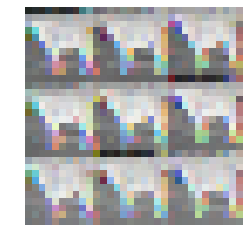

Predicted Label: 7
Actual Label: [7.]


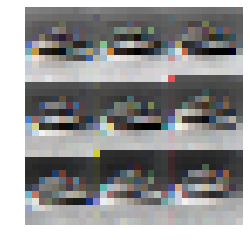

Predicted Label: 9
Actual Label: [8.]


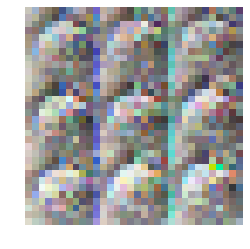

Predicted Label: 6
Actual Label: [6.]


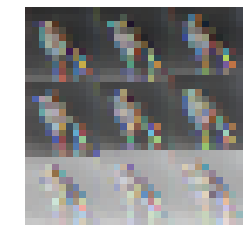

Predicted Label: 7
Actual Label: [2.]


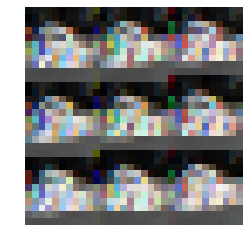

Predicted Label: 9
Actual Label: [9.]


In [174]:
for i in (104,130,106,181,127):
  plt.imshow(test_show[i]),plt.axis("off")
  plt.show()
  print("Predicted Label: "+str(test2[i]))
  print("Actual Label: "+str(dtl1[:,i]))


##  ....END....